In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2

from config import host_value, user_value, password_value, port_value, database_value

In [2]:
# test database connection 
try:
    connection = psycopg2.connect(user = user_value,
                                  password = password_value,
                                  host = host_value,
                                  port = port_value,
                                  database = database_value)
    cursor = connection.cursor()
    # Print PostgreSQL Connection properties
    print ( connection.get_dsn_parameters(),"\n")
    # Print PostgreSQL version
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record,"\n")
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
finally:
    #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")


{'user': 'postgres', 'dbname': 'Employees', 'host': '127.0.0.1', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 11.4 on x86_64-apple-darwin, compiled by Apple LLVM version 6.0 (clang-600.0.54) (based on LLVM 3.5svn), 64-bit',) 

PostgreSQL connection is closed


In [3]:
connection = psycopg2.connect(user = user_value,
                        password = password_value,
                        host = host_value,
                        port = port_value,
                        database = database_value)
cursor = connection.cursor()
pgSQL_select_Query = 'select t.title, round(avg(s.salary), 2) as average from public."Titles" t \
                        inner join public."Salaries" s on t.emp_no = s.emp_no \
                        group by t.title order by t.title;'
cursor.execute(pgSQL_select_Query)
title_df = pd.DataFrame(cursor.fetchall(), columns=['titles','averages'])
title_df['averages'] = pd.to_numeric(title_df['averages'])
title_df


,titles,averages
0,Assistant Engineer,48493.20
1,Engineer,48539.78
2,Manager,51531.04
3,Senior Engineer,48506.75
4,Senior Staff,58503.29
5,Staff,58465.27
6,Technique Leader,48580.51


<IPython.core.display.Javascript object>


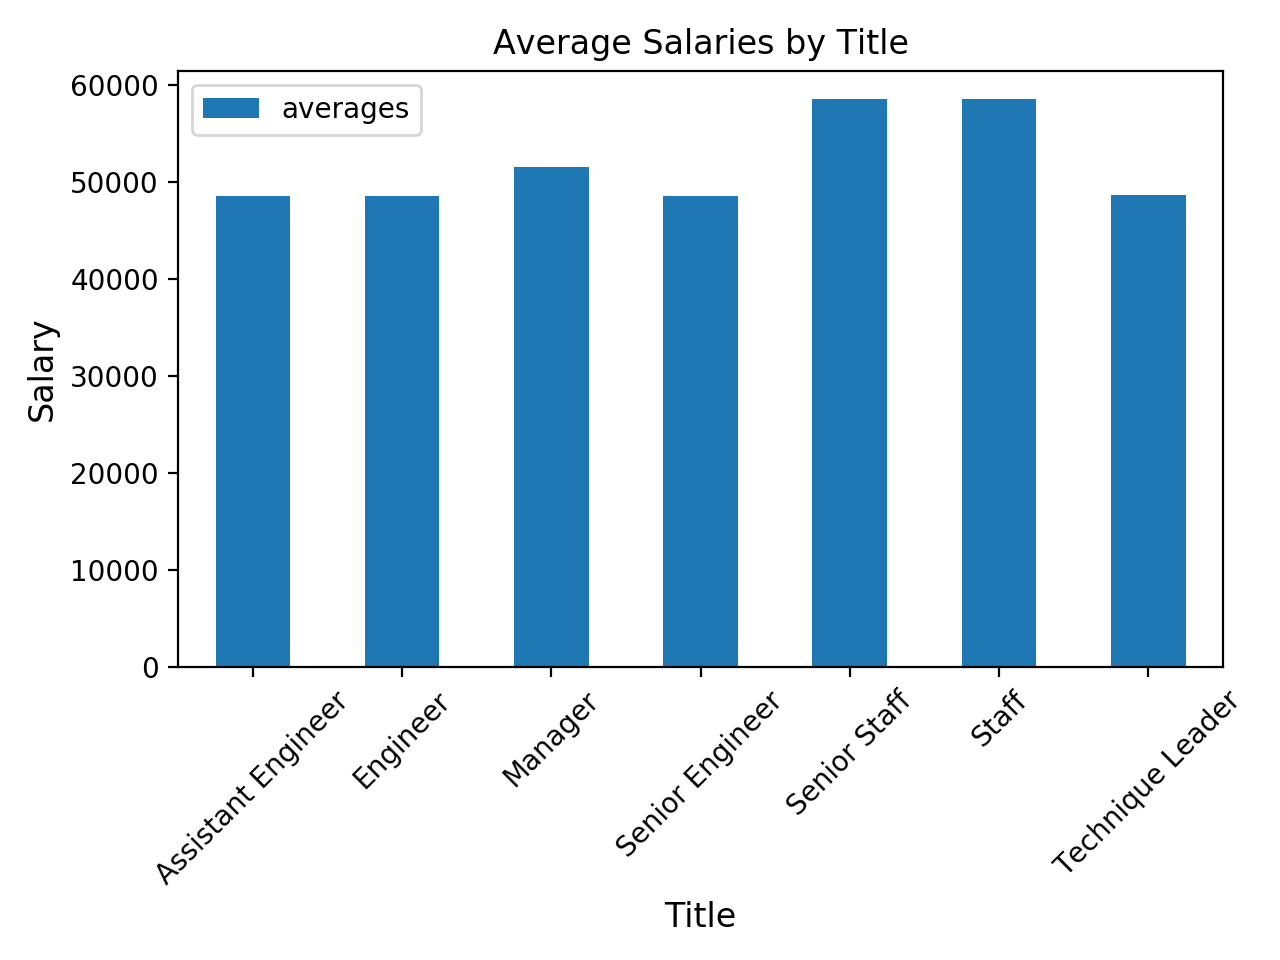

In [4]:
title_df.plot.bar('titles', 'averages', title="Average Salaries by Title", fontsize=14)
plt.xlabel("Title", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Salary", fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("images/AverageSalariesByTitle.png")
plt.show()


Technical Report

To start the database creation, the CSV files were reviewed to identify data types, primary and foreign keys, and other contraints. Utilizing the quickdatabasediagrams.com site, the ERD was designed with notes from the CSV review, an image of the ERD was published, and the schema.sql was exported.

The Employees database was created in postgreSQL where the scheme.sql was executed to create the tables. The CSV files were then imported. The data analysis was completed by following the instructions in the assignment. 

To complete the Bonus, the psycopg2 module was installed. A pandas data frame was created by successfully connecting to the postgreSQL database with psycopg2.connect() and executing a SQL select query to pull the average salaries by title. The bar graph was published with the matplotlib.pyplot interface.